# Machine learning framework for prediction of patient-hospital readmission in US
### Part 1: Data Preparation
#### Author: Andrea Marcela Huerfano Barbosa 
##### Modified: 31th October

### Contents
* [I. Dataset description](#I.-Dataset-description)
    * [Loading the dataset](#1.-Loading-the-dataset)

* [II. Data preparation](#II.-Data-preparation)
       
    * [1. Removing columns with an unique value](#1.-Removing-columns-with-an-unique-value)
    * [2. Duplicates](#2.-Duplicates)
    * [3. Removing death and hospice people ](#3.-Removing-death-and-hospice-people)
    * [4. Missing Values](#4.-Missing-Values)
    * [5. Recategorization](#5.-Recategorization)
    * [6. Checking the distribution of other categorical attributes](#6.-Checking-the-distribution-of-other-categorical-attributes)
    * [7. Removing the unknown gender](#7.-Removing-the-unknown-gender)
    * [8. Categories for ages](#8.-Categories-for-ages)
    * [9. Categories for Readmitted](#9.-Categories-for-Readmitted)
    * [10. Categories for Primary Diagnosis](#10.Categories-for-Primary-Diagnosis)
    * [11. Codification One hot](#11.-Codification-One-hot)

## I. Dataset description

The dataset is available in the UCI repository as [Diabetes 130-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#). 

- The data was collected from 130 hospitals in the U.S. during 10 years(1999-2008)
- Contains 101,766 observations and 50 features, including demographic attributes, diagnostics, medications and hospital outcome.


#### 1. Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset=pd.read_csv('C:/Users/Andrea/Desktop/Readmission Project/dataset_diabetes/diabetic_data.csv', 
                    na_values=["?"])
print('The input contains', dataset.shape[0], 'columns and ' , dataset.shape[1], 'rows')

The input contains 101766 columns and  50 rows


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(dataset)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,NaN,NaN,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


## II. Data preparation

Since the original database contains incomplete, redundant, and noisy informa-tion. The methodology for the data preparation is described below.

#### 1. Removing columns with an unique value

In [4]:
for col in dataset.columns: ##Two columns were removed 
    if len(dataset[col].unique()) == 1:
        dataset.drop(col,inplace=True,axis=1)
        
print('After removing the columns with an unique value, into the dataset remains', len(dataset.columns),'columns')

After removing the columns with an unique value, into the dataset remains 48 columns


#### 2. Duplicates

No duplicates by encounter identifier

In [5]:
dataset[dataset.duplicated(['encounter_id'])]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


But checking at patient level, there is 30.248 records associated with duplicates. Even when they correspond to different encounter (hospital admission) they are *not statistical independient*.

In [6]:
print( 'Unique records:',len(dataset.patient_nbr.unique()) ,'\nDuplicates: ', len(dataset.patient_nbr)-len(dataset.patient_nbr.unique()))

Unique records: 71518 
Duplicates:  30248


Considering the first record into the dataset for the duplicate patients.

In [7]:
dataset.sort_values("patient_nbr", inplace=True) 
dataset.drop_duplicates(subset ="patient_nbr", keep = 'first', inplace = True) 

In [8]:
print('After removing duplicates there is:', len(dataset),  'observations')

After removing duplicates there is: 71518 observations


#### 3. Removing death and hospice people 

Removing people related to death or hospice since they will not have any chance to be readmitted

In [9]:
dataset=dataset[~dataset.discharge_disposition_id.isin([11,13,14,19,20,21])]

#### 4. Missing Values

Cheking the percentual missing rate by column

In [10]:
pd.set_option("display.max_rows", 100)
is_na=dataset.isna().sum().sort_values(ascending=False)
np.round(100*is_na/len(np.unique(dataset['encounter_id'])),2)

weight                      96.00
medical_specialty           48.02
payer_code                  42.84
race                         2.70
diag_3                       1.70
diag_2                       0.43
diag_1                       0.02
num_procedures               0.00
number_diagnoses             0.00
number_inpatient             0.00
number_emergency             0.00
number_outpatient            0.00
num_medications              0.00
readmitted                   0.00
num_lab_procedures           0.00
diabetesMed                  0.00
time_in_hospital             0.00
admission_source_id          0.00
discharge_disposition_id     0.00
admission_type_id            0.00
age                          0.00
gender                       0.00
patient_nbr                  0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
miglitol                     0.00
change                       0.00
metformin-pioglitazone       0.00
metformin-rosi

Weight, Payer code and Medical speciality were removed since it had a high percentage of missing values.

In [11]:
most_missing_cols = dataset.columns[dataset.isnull().mean() > 0.40]
most_missing_cols =most_missing_cols.to_list() 
dataset=dataset.drop(most_missing_cols, axis=1)

The observations with any missing values, nulls or no mapping attributes will be removed as well.

In [12]:
dataset=dataset.dropna() 
dataset=dataset[~((dataset.admission_type_id.isin([5,6,8])) | (dataset.discharge_disposition_id.isin([18,25,26])) | (dataset.admission_source_id.isin([17,20,9] )))]  ##Removing nulls, not available or not mapped 

print( 'After removing the null values remain', dataset.shape[0], 'patients')

After removing the null values remain 56196 patients


#### 5. Recategorization

- Admission Type

In [13]:
def barchart_horizontal(column, labels, title, plot_name,a,b):
    feq=dataset.pivot_table(index=column, values='encounter_id', aggfunc='count')
    feq['Type']=labels
    feq.set_index('Type', inplace=True)
    feq=feq.sort_values(by='encounter_id', ascending=True)
    feq.plot.barh(figsize=(a,b),  width= 1)
    plt.xlabel('Number of patients', fontsize = 11)
    plt.ylabel('')
    plt.legend().set_visible(False)
    return plt.show()

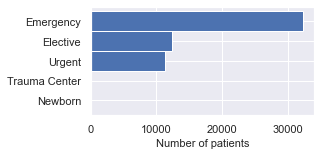

In [14]:
Admission_ty=['Emergency','Urgent','Elective','Newborn','Trauma Center']
barchart_horizontal('admission_type_id', Admission_ty, 'Admission Type Distribution', 'Admission_type.png',4,2)

The admission type will be reduce in just two categories: Emergency and No Emergency

In [15]:
dataset['admission_type'] = dataset['admission_type_id'].apply(lambda x: 1 if x > 1 else 0) #Checking ID_Mapping: 1= Emergency
dataset.pivot_table(index='admission_type', values='admission_type_id', aggfunc='count')

,admission_type_id
admission_type,
0,32382
1,23814


- Discharge Disposition

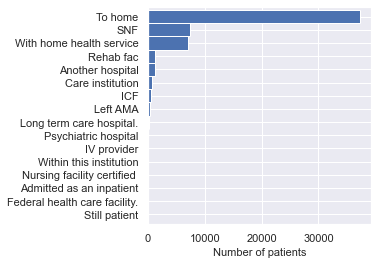

In [16]:
dispositions=['To home',
'Another hospital',
'SNF',
'ICF',
'Care institution',
'With home health service',
'Left AMA',
'IV provider',
'Admitted as an inpatient',
'Still patient',
'Within this institution',
'Rehab fac',
'Long term care hospital.',
'Nursing facility certified ',
'Federal health care facility.',
'Psychiatric hospital'
]

barchart_horizontal('discharge_disposition_id', dispositions,'Discharge Disposition Distribution', 'Discharge_Disposition.png',4,4)

Discharged disposition will be reduce in just two categories: Discharged to home and Not discharge to home

In [17]:
dataset['Discharged_type'] = dataset['discharge_disposition_id'].apply(lambda x: 1 if x > 1 else 0) ##Checking ID_Mapping: 1= Discharged to home
dataset.pivot_table(index='Discharged_type', values='encounter_id', aggfunc='count')

,encounter_id
Discharged_type,
0,37366
1,18830


- Admission Source

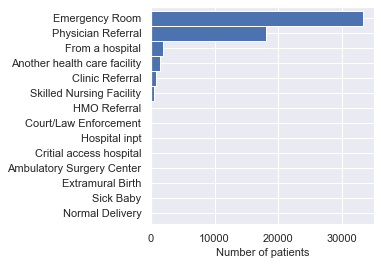

In [18]:
admission_source=[
'Physician Referral',
'Clinic Referral',
'HMO Referral',
'From a hospital',
'Skilled Nursing Facility',
'Another health care facility',
'Emergency Room',
'Court/Law Enforcement',
'Critial access hospital',
'Normal Delivery',
'Sick Baby',
'Extramural Birth',
'Hospital inpt',
'Ambulatory Surgery Center']
barchart_horizontal('admission_source_id', admission_source,'Admission Source Distribution', 'Admission_source.png',4,4)


The admission type will be reduce in just two categories: Emergency room and No emergency room

In [19]:
dataset['Admision_source'] = dataset['admission_source_id'].apply(lambda x: 1 if x==7 else 0) ##Checking ID_Mapping: Emergency Room 1

Dropping the original columns associated with admission type, discharge disposition and admission source

In [20]:
dataset=dataset.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1) 

#### 6. Checking the distribution of other categorical attributes

Let's see the distribution of the general medication prescribed, the change in diabetic medications and if the patient was readdmited.

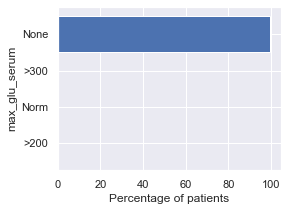

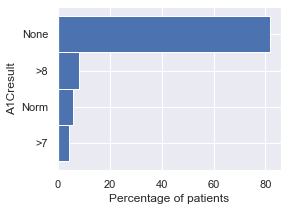

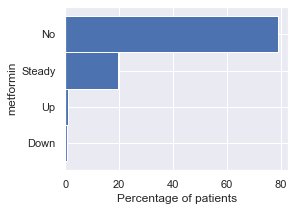

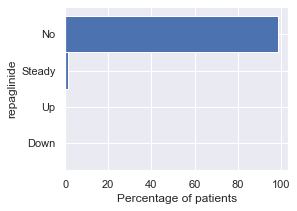

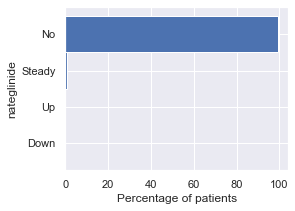

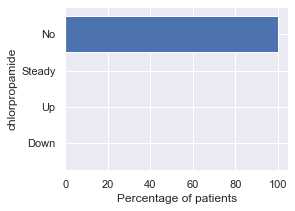

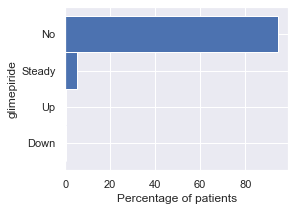

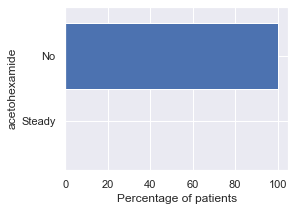

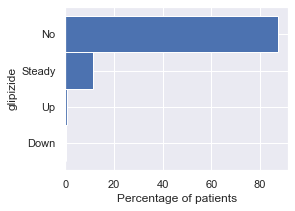

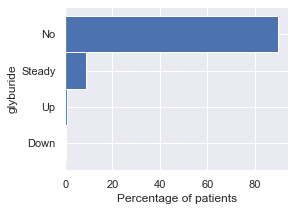

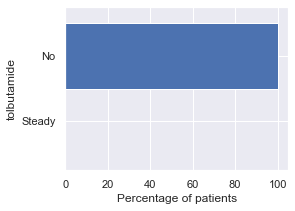

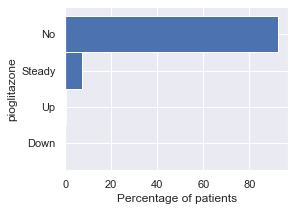

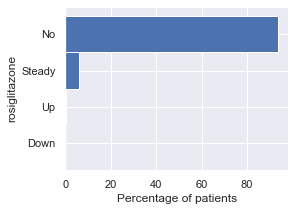

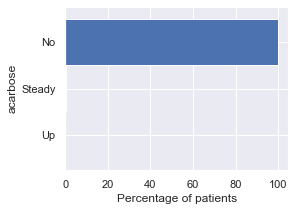

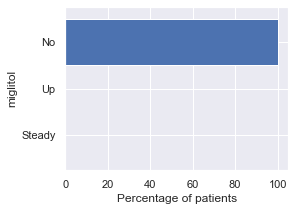

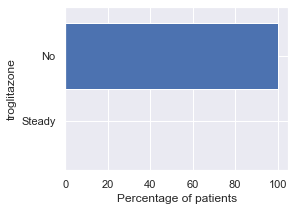

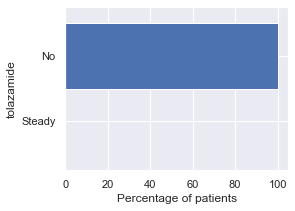

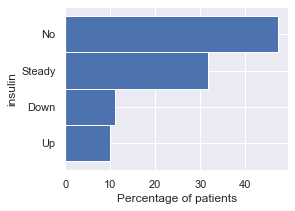

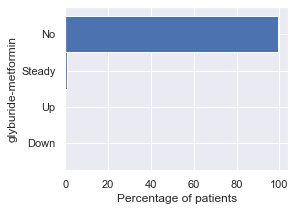

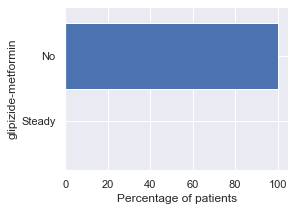

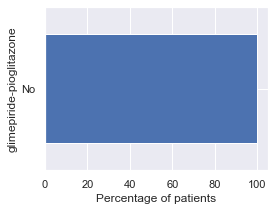

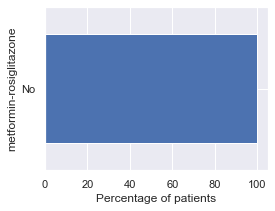

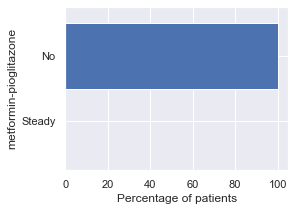

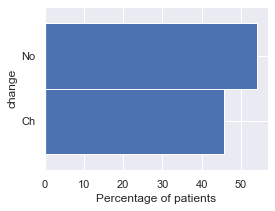

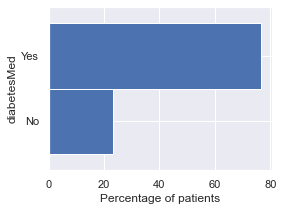

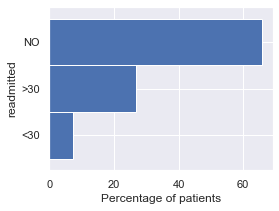

In [21]:
medical=['max_glu_serum','A1Cresult','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'insulin', 
        'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted' ]
for var in medical:
    
    pivot = dataset.pivot_table(index=[var], values=['encounter_id'], aggfunc='count', margins=False)
    pivot0=pivot.reset_index()
    pivot0['percentage']= np.round(100* (pivot0['encounter_id']/pivot0['encounter_id'].sum()),1)

    feq = pivot0[[var, 'percentage']].sort_values('percentage')
    feq=feq.set_index(var)
    feq.plot.barh(figsize=(4,3),  width= 1)
    plt.xlabel('Percentage of patients', fontsize = 12)
    plt.ylabel(var, fontsize = 12)
    plt.legend().set_visible(False)
    plt.show()

The columns below will be removed since the majority of their values are associated with an unique class.

In [22]:
no_distr=['max_glu_serum','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone' ]
dataset=dataset.drop(no_distr, axis=1)

In [23]:
print('After all of these changes into the columns into the dataset remain ', len(dataset.columns), 'columns')

After all of these changes into the columns into the dataset remain  27 columns


##### Checking the demographics and the output

In [24]:
def category_count_plot(df,col, figsize=(5,3)):
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.xticks(rotation=0)
    plt.ylabel('Number of patients')
    plt.show()

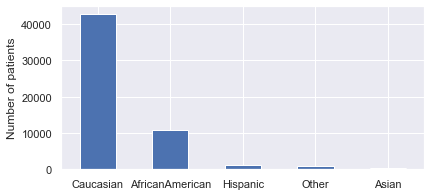

Caucasian          76.1
AfricanAmerican    19.5
Hispanic            2.0
Other               1.7
Asian               0.7
Name: race, dtype: float64


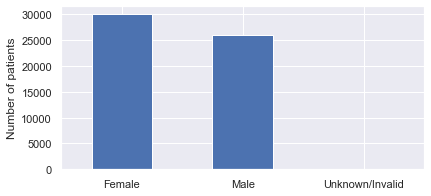

Female             53.5
Male               46.5
Unknown/Invalid     0.0
Name: gender, dtype: float64


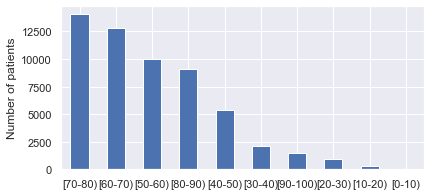

[70-80)     25.0
[60-70)     22.7
[50-60)     17.9
[80-90)     16.2
[40-50)      9.5
[30-40)      3.8
[90-100)     2.6
[20-30)      1.6
[10-20)      0.6
[0-10)       0.1
Name: age, dtype: float64


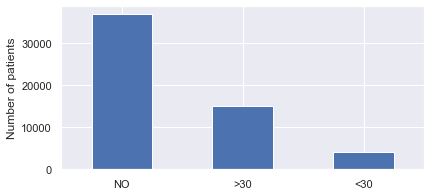

NO     65.8
>30    26.9
<30     7.3
Name: readmitted, dtype: float64


In [25]:
demographics=['race','gender', 'age', 'readmitted']
for col in demographics:
    category_count_plot(dataset,col, figsize=(6.5,3))
    print(round(dataset[col].value_counts(normalize=True)*100,1))

#### 7. Removing the Unknown gender

In [26]:
dataset=dataset[dataset['gender'].isin(['Female', 'Male' ])]

#### 8. Categories for ages

New categories are created to have a more even distribution within classes.

In [27]:
dataset.loc[dataset.age.str.contains('10|20|30'), 'age']='Less_fourty' 
dataset.loc[dataset.age.str.contains('40|50'), 'age']='Between_fourty_sixty'
dataset.loc[dataset.age.str.contains('60'), 'age']='Between_sixty_seventy'
dataset.loc[dataset.age.str.contains('70|80|90'), 'age']='Greater_seventy'

In [28]:
dataset.pivot_table(index='age', values='encounter_id', aggfunc='count')

,encounter_id
age,
Between_fourty_sixty,15395
Between_sixty_seventy,12783
Greater_seventy,23159
Less_fourty,4858


#### 9. Categories for Readmitted

Since the readmission in more than 30 days could be related with the state of the patient and not properly with the previous treatment, this variable is codified as binary when 1 represent a readmission in less than 30 days and 0 in other case. Let's see the original distribution.

In [29]:
func = lambda x: round(100*x.count()/dataset.shape[0],1)
readmitted_distribution=dataset.pivot_table(index='readmitted', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

,% Total
readmitted,
<30,7.3
>30,26.9
NO,65.8
All,100.0


Creating the new categorization.

In [30]:
dataset['readmitted'] = dataset['readmitted'].replace('>30', 0)
dataset['readmitted'] = dataset['readmitted'].replace('<30', 1)
dataset['readmitted'] = dataset['readmitted'].replace('NO', 0)

readmitted_distribution=dataset.pivot_table(index='readmitted', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

,% Total
readmitted,
0,92.7
1,7.3
All,100.0


Just 7.3% of the dataset is people who was readmitted in less than 30 days after of the hospitalization. Moving forward with the binary models this could be a problem since most of the machine learning algorithms needs a similar proportion into the classes. 

Checking the readmitted distribution bewtween the cuantitative variables: The number_inpatient tends to be higher for the readmitted in contrast with those patients with more procedures who present less ratio of readmitted. There is not any special distribution for readmitted and 

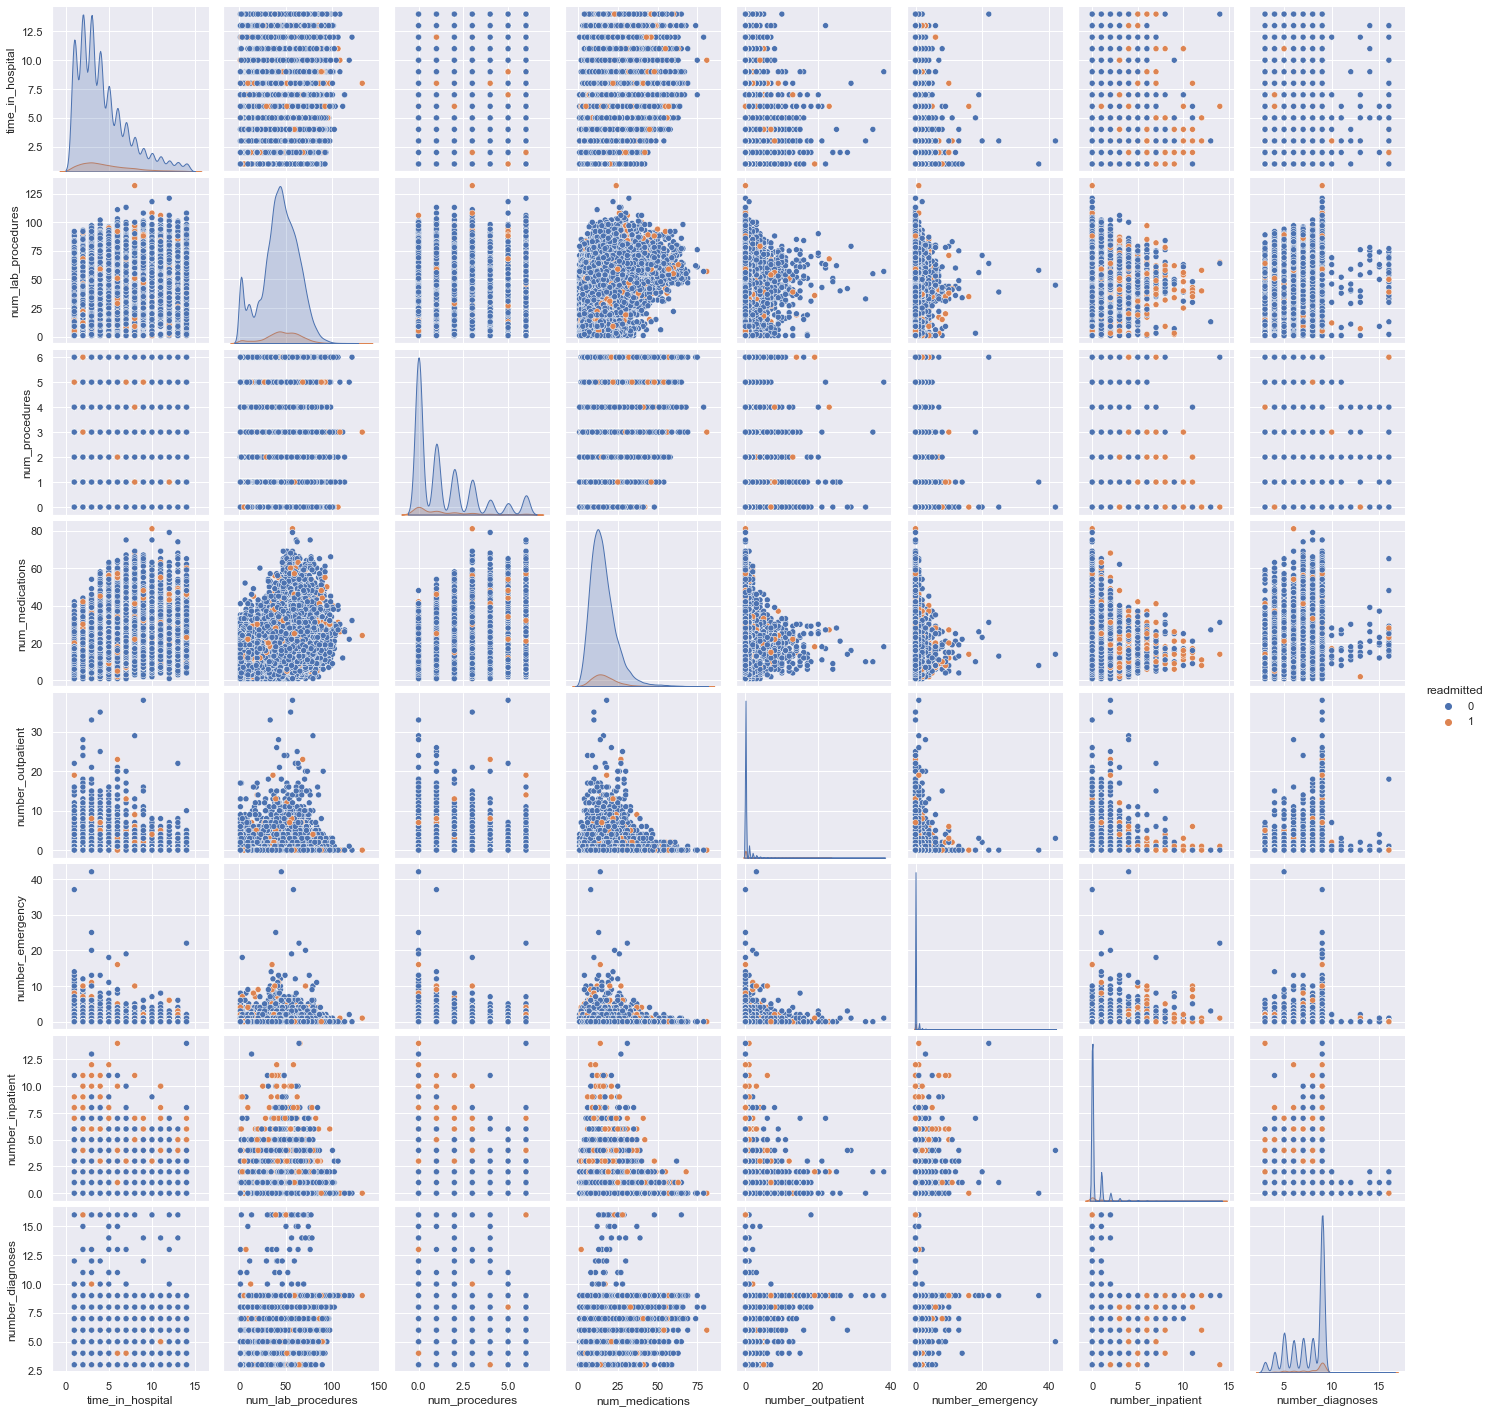

In [31]:
quant_col=dataset[['readmitted','time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses']]

sns.pairplot(quant_col, hue="readmitted")
plt.savefig('pair_plot.png')

In [32]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(dataset)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,admission_type,Discharged_type,Admision_source
4267,24437208,135,Caucasian,Female,Between_fourty_sixty,8,77,6,33,0,0,0,401,997,560,8,None,Steady,No,Down,Steady,Ch,Yes,1,1,0,0
5827,29758806,378,Caucasian,Female,Between_fourty_sixty,2,49,1,11,0,0,0,722,305,250,3,None,No,No,No,No,No,No,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101748,443811536,189481478,Caucasian,Female,Between_fourty_sixty,14,69,0,16,0,0,0,295,305,250,5,>7,Up,No,Steady,Down,Ch,Yes,0,0,1,1
96147,371459060,189502619,Caucasian,Male,Between_fourty_sixty,5,35,4,23,0,0,0,553,518,V85,8,None,No,No,No,Up,Ch,Yes,0,1,0,0


In [33]:
dataset['A1Cresult']=dataset['A1Cresult'].str.replace('>', '')

#### 10. Categories for Primary Diagnosis

Values of the primary diagnosis were aggregated in 9 specialities. Following the groups presented in a research [article](https://www.hindawi.com/journals/bmri/2014/781670/tab2/) 

In [34]:
dataset.loc[dataset['diag_1'].str.contains('V'), 'diag_1'] = '1'
dataset.loc[dataset['diag_1'].str.contains('E'), 'diag_1'] = '1'
dataset['diag_1']=dataset['diag_1'].astype(float)
dataset['diag_type'] = dataset['diag_1'].apply(lambda x: 'Diabetes' if x==250 
                                               else 'Other' if x==1 
                                               else 'Circulatory' if x>=390 and x<=459 or x==785
                                               else 'Respiratory' if x>=460 and x<=519 or x==786
                                               else 'Digestive' if x>=520 and x<=579 or x==787
                                               else 'Genitourinary' if x>=580 and x<=629 or x==788
                                               else 'Neoplasms' if x>=140 and x<=239 
                                               else 'Musculoskeletal' if x>=710 and x<=739 
                                               else 'Injury' if x>=800 and x<=999
                                               else 'Other')

pd.set_option("display.max_rows", 700)
dataset.pivot_table(index=['diag_type'], values='encounter_id', aggfunc='count')

,encounter_id
diag_type,
Circulatory,17116
Diabetes,149
Digestive,5246
Genitourinary,2896
Injury,3943
Musculoskeletal,3115
Neoplasms,2046
Other,14145
Respiratory,7539


#### 11. Codification One hot

In [35]:
categorias_revisar= ['change', 'diabetesMed', 'insulin', 'A1Cresult', 'metformin', 'glipizide', 'glyburide']
for var in categorias_revisar:
    print(var, dataset[var].unique()) 

change ['Ch' 'No']
diabetesMed ['Yes' 'No']
insulin ['Steady' 'No' 'Down' 'Up']
A1Cresult ['None' '7' '8' 'Norm']
metformin ['Steady' 'No' 'Down' 'Up']
glipizide ['No' 'Up' 'Steady' 'Down']
glyburide ['Down' 'No' 'Steady' 'Up']


In [36]:
for var in ['diabetesMed']:
    dataset.loc[dataset[var].str.contains('Yes'), var] = '1'
    dataset.loc[dataset[var].str.contains('No'), var] = '0'
    dataset[var]=dataset[var].astype('int64')

In [37]:
dataset.loc[dataset['change'].str.contains('Ch'), 'change'] = '1'
dataset.loc[dataset['change'].str.contains('No'), 'change'] = '0'
dataset['change']=dataset['change'].astype('int64')

In [38]:
dummies_creation=['race','gender','insulin','age', 'A1Cresult', 'diag_type','metformin', 'glipizide', 'glyburide']
for var in dummies_creation:
    dataset=pd.concat([dataset, pd.get_dummies(dataset[var], prefix=var)], axis=1) 

In [39]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(dataset)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,admission_type,Discharged_type,Admision_source,diag_type,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,insulin_Down,insulin_No,insulin_Steady,insulin_Up,age_Between_fourty_sixty,age_Between_sixty_seventy,age_Greater_seventy,age_Less_fourty,A1Cresult_7,A1Cresult_8,A1Cresult_None,A1Cresult_Norm,diag_type_Circulatory,diag_type_Diabetes,diag_type_Digestive,diag_type_Genitourinary,diag_type_Injury,diag_type_Musculoskeletal,diag_type_Neoplasms,diag_type_Other,diag_type_Respiratory,metformin_Down,metformin_No,metformin_Steady,metformin_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up
4267,24437208,135,Caucasian,Female,Between_fourty_sixty,8,77,6,33,0,0,0,401.0,997,560,8,None,Steady,No,Down,Steady,1,1,1,1,0,0,Circulatory,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
5827,29758806,378,Caucasian,Female,Between_fourty_sixty,2,49,1,11,0,0,0,722.0,305,250,3,None,No,No,No,No,0,0,0,1,0,0,Musculoskeletal,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101748,443811536,189481478,Caucasian,Female,Between_fourty_sixty,14,69,0,16,0,0,0,295.0,305,250,5,7,Up,No,Steady,Down,1,1,0,0,1,1,Other,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
96147,371459060,189502619,Caucasian,Male,Between_fourty_sixty,5,35,4,23,0,0,0,553.0,518,V85,8,None,No,No,No,Up,1,1,0,1,0,0,Digestive,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [40]:
dataset=dataset.drop(dummies_creation+['diag_1', 'diag_2', 'diag_3'], axis=1)

After all the data wrangling the final dataset contains 56.195 records and 56 attributes, having the readmission status as the outcome. This dataset consists of hospital admissions that did not result in a patient death or discharge to a hospice. Each encounter corresponds to a unique patient diagnosed with diabetes, although the primary diagnosis may be different. 

In [41]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(dataset)

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,admission_type,Discharged_type,Admision_source,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,insulin_Down,insulin_No,insulin_Steady,insulin_Up,age_Between_fourty_sixty,age_Between_sixty_seventy,age_Greater_seventy,age_Less_fourty,A1Cresult_7,A1Cresult_8,A1Cresult_None,A1Cresult_Norm,diag_type_Circulatory,diag_type_Diabetes,diag_type_Digestive,diag_type_Genitourinary,diag_type_Injury,diag_type_Musculoskeletal,diag_type_Neoplasms,diag_type_Other,diag_type_Respiratory,metformin_Down,metformin_No,metformin_Steady,metformin_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up
4267,24437208,135,8,77,6,33,0,0,0,8,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
5827,29758806,378,2,49,1,11,0,0,0,3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101748,443811536,189481478,14,69,0,16,0,0,0,5,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
96147,371459060,189502619,5,35,4,23,0,0,0,8,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [42]:
dataset.to_csv('Clean_readmitted_oct31.csv')